In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [2]:
df = pd.read_excel('premiums.xlsx')
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [3]:
df.shape

(50000, 13)

In [4]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [5]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [6]:
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


### Handle Null values

In [7]:
df.isna().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [10]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [11]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [12]:
df[df.number_of_dependants <0].shape

(72, 13)

In [13]:
df[df.number_of_dependants <0]['number_of_dependants'].unique()

array([-3, -1])

In [14]:
df['number_of_dependants']= abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    49976.000000
mean         1.717284
std          1.491953
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

In [15]:
# Get only numeric columns
numeric_cols = df.select_dtypes(include='number')

# Show the names of numeric columns
print(numeric_cols.columns)


Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')


In [16]:
numeric_columns  = df.select_dtypes(['float64','int64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

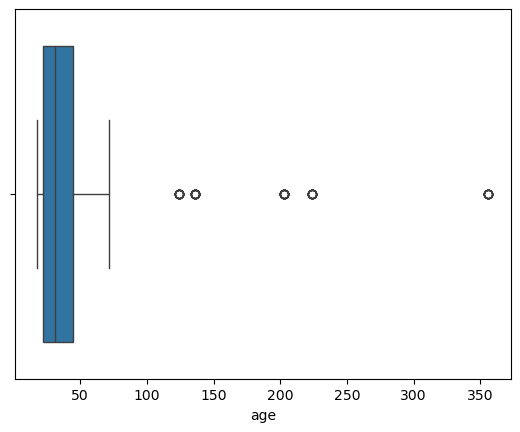

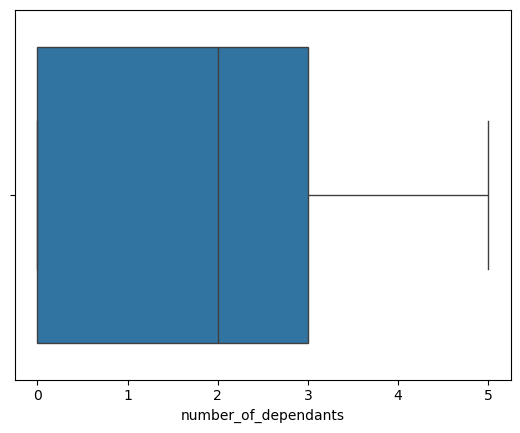

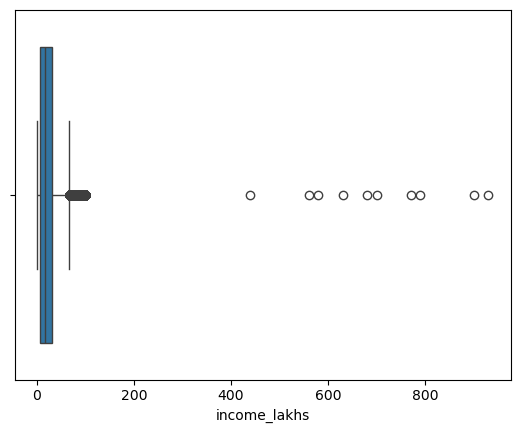

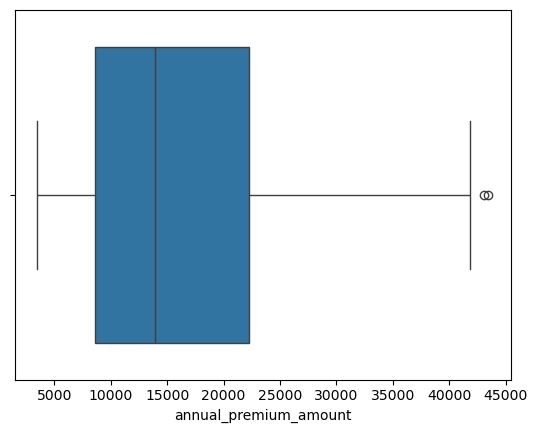

In [17]:
for col in numeric_columns:
    sns.boxplot(x= df[col])
    plt.show()

In [18]:
df[df['age']>100].shape

(58, 13)

In [19]:
df= df[df['age']<=100]

In [20]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.717617,23.025141,15766.589286
std,13.681600,1.492074,24.227912,8419.137327
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


In [21]:
df.shape

(49918, 13)

<Axes: xlabel='income_lakhs', ylabel='Count'>

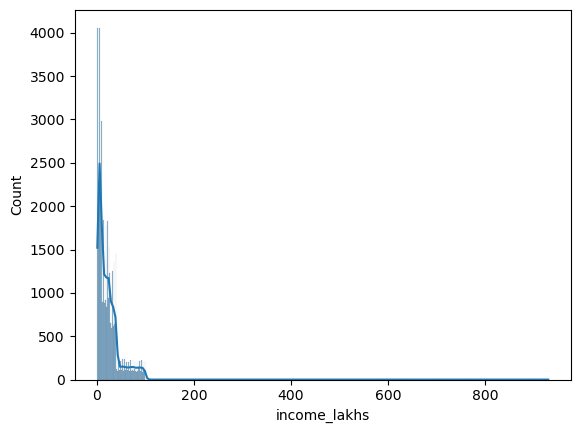

In [22]:
sns.histplot(df['income_lakhs'], kde = True)

In [23]:
df[df['income_lakhs']>100]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
2635,51,Male,Northwest,Married,4,Obesity,No Smoking,Self-Employed,> 40L,560,High blood pressure,Gold,30692
4220,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,440,No Disease,Silver,10636
7775,35,Female,Northeast,Unmarried,0,Overweight,No Smoking,Salaried,> 40L,630,Diabetes,Gold,24010
9021,43,Male,Southeast,Married,3,Obesity,Regular,Salaried,> 40L,900,Diabetes & Thyroid,Gold,30848
10337,37,Female,Southeast,Married,3,Normal,No Smoking,Freelancer,> 40L,930,Diabetes,Silver,15945
10639,20,Female,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,> 40L,580,Thyroid,Silver,12888
11456,21,Female,Southwest,Unmarried,0,Obesity,No Smoking,Freelancer,> 40L,700,No Disease,Bronze,7424
15437,21,Female,Southeast,Unmarried,0,Normal,Occasional,Salaried,> 40L,790,No Disease,Silver,7586
35446,59,Male,Northwest,Married,2,Obesity,Occasional,Self-Employed,> 40L,770,Thyroid,Gold,31115
40970,48,Male,Northeast,Married,4,Obesity,No Smoking,Salaried,> 40L,680,No Disease,Gold,28926


In [24]:
# Finding lower and upper quantile limit
Q1, Q3 = df['income_lakhs'].quantile([0.25,0.75])
Q1, Q3

(7.0, 31.0)

In [25]:
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
lower, upper

(-29.0, 67.0)

In [26]:
quantile_threshold = df.income_lakhs.quantile(0.999)
quantile_threshold

100.0

In [27]:
df[df['income_lakhs']>100].shape

(10, 13)

In [28]:
df= df[df['income_lakhs']<=quantile_threshold]
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [29]:
df.shape

(49908, 13)

In [30]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49908.000000,49908.000000,49908.000000,49908.000000
mean,34.401579,1.717640,22.889897,15765.739641
std,13.681604,1.492032,22.170699,8418.674061
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22270.500000
max,72.000000,5.000000,100.000000,43471.000000


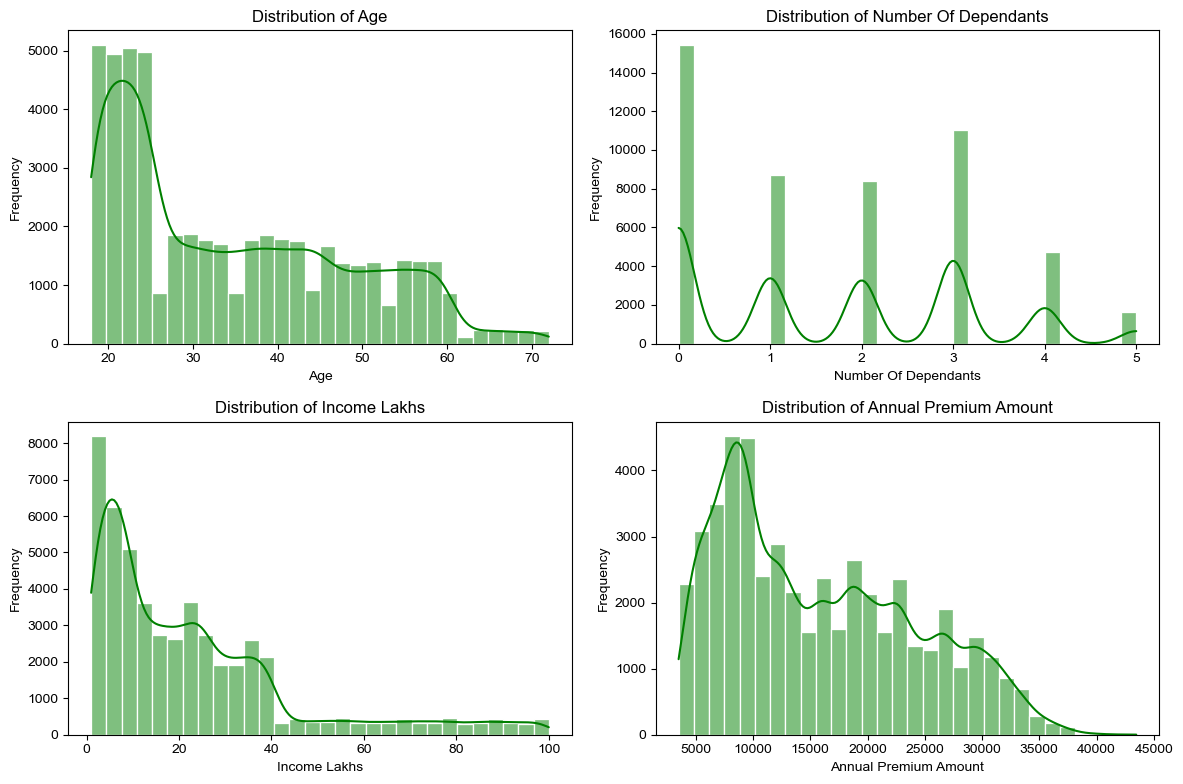

In [31]:
# Columns to plot
cols = ['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount']

# Set up the 2x2 plot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.set(style='whitegrid')

# Flatten axes array for easy indexing
axes = axes.flatten()

# Loop through each column and plot
for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, kde=True, bins=30, color='green', ax=axes[i])
    axes[i].set_title(f'Distribution of {col.replace("_", " ").title()}')
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

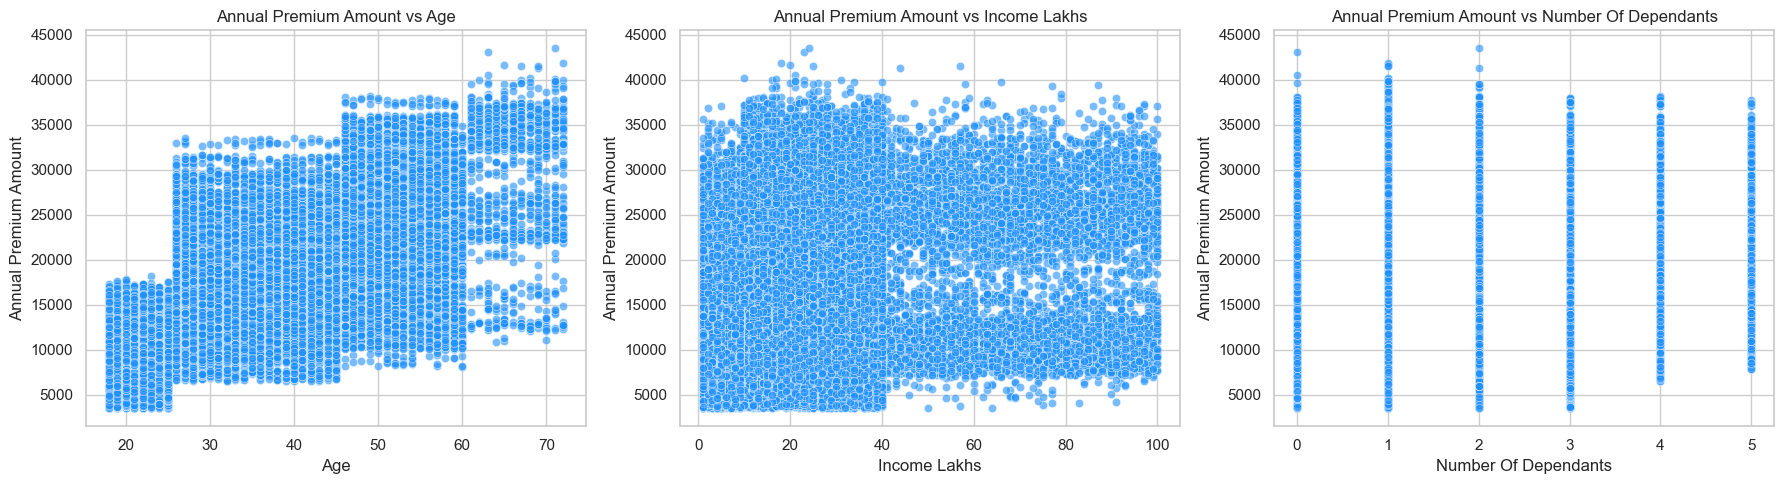

In [32]:
cols = ['age', 'income_lakhs', 'number_of_dependants']
target = 'annual_premium_amount'

# Set Seaborn style
sns.set(style='whitegrid')

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Generate scatter plots
for i, col in enumerate(cols):
    sns.scatterplot(data=df, x=col, y=target, ax=axes[i], color='dodgerblue', alpha=0.6)
    axes[i].set_title(f'{target.replace("_", " ").title()} vs {col.replace("_", " ").title()}')
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel(target.replace("_", " ").title())

plt.tight_layout()
plt.show()

In [33]:
df.dtypes

age                       int64
gender                   object
region                   object
marital_status           object
number_of_dependants      int64
bmi_category             object
smoking_status           object
employment_status        object
income_level             object
income_lakhs              int64
medical_history          object
insurance_plan           object
annual_premium_amount     int64
dtype: object

In [34]:
# Filter categorical columns (dtype == object)
categorical_cols = df.select_dtypes(include='object').columns

# Print unique values for each categorical column
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: gender
['Male' 'Female']

Column: region
['Northwest' 'Southeast' 'Northeast' 'Southwest']

Column: marital_status
['Unmarried' 'Married']

Column: bmi_category
['Normal' 'Obesity' 'Overweight' 'Underweight']

Column: smoking_status
['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']

Column: employment_status
['Salaried' 'Self-Employed' 'Freelancer']

Column: income_level
['<10L' '10L - 25L' '> 40L' '25L - 40L']

Column: medical_history
['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']

Column: insurance_plan
['Bronze' 'Silver' 'Gold']


In [35]:
df['smoking_status'] = df['smoking_status'].replace(
    ['Smoking=0', 'Does Not Smoke', 'Not Smoking'], 'No Smoking'
)

In [36]:
df['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

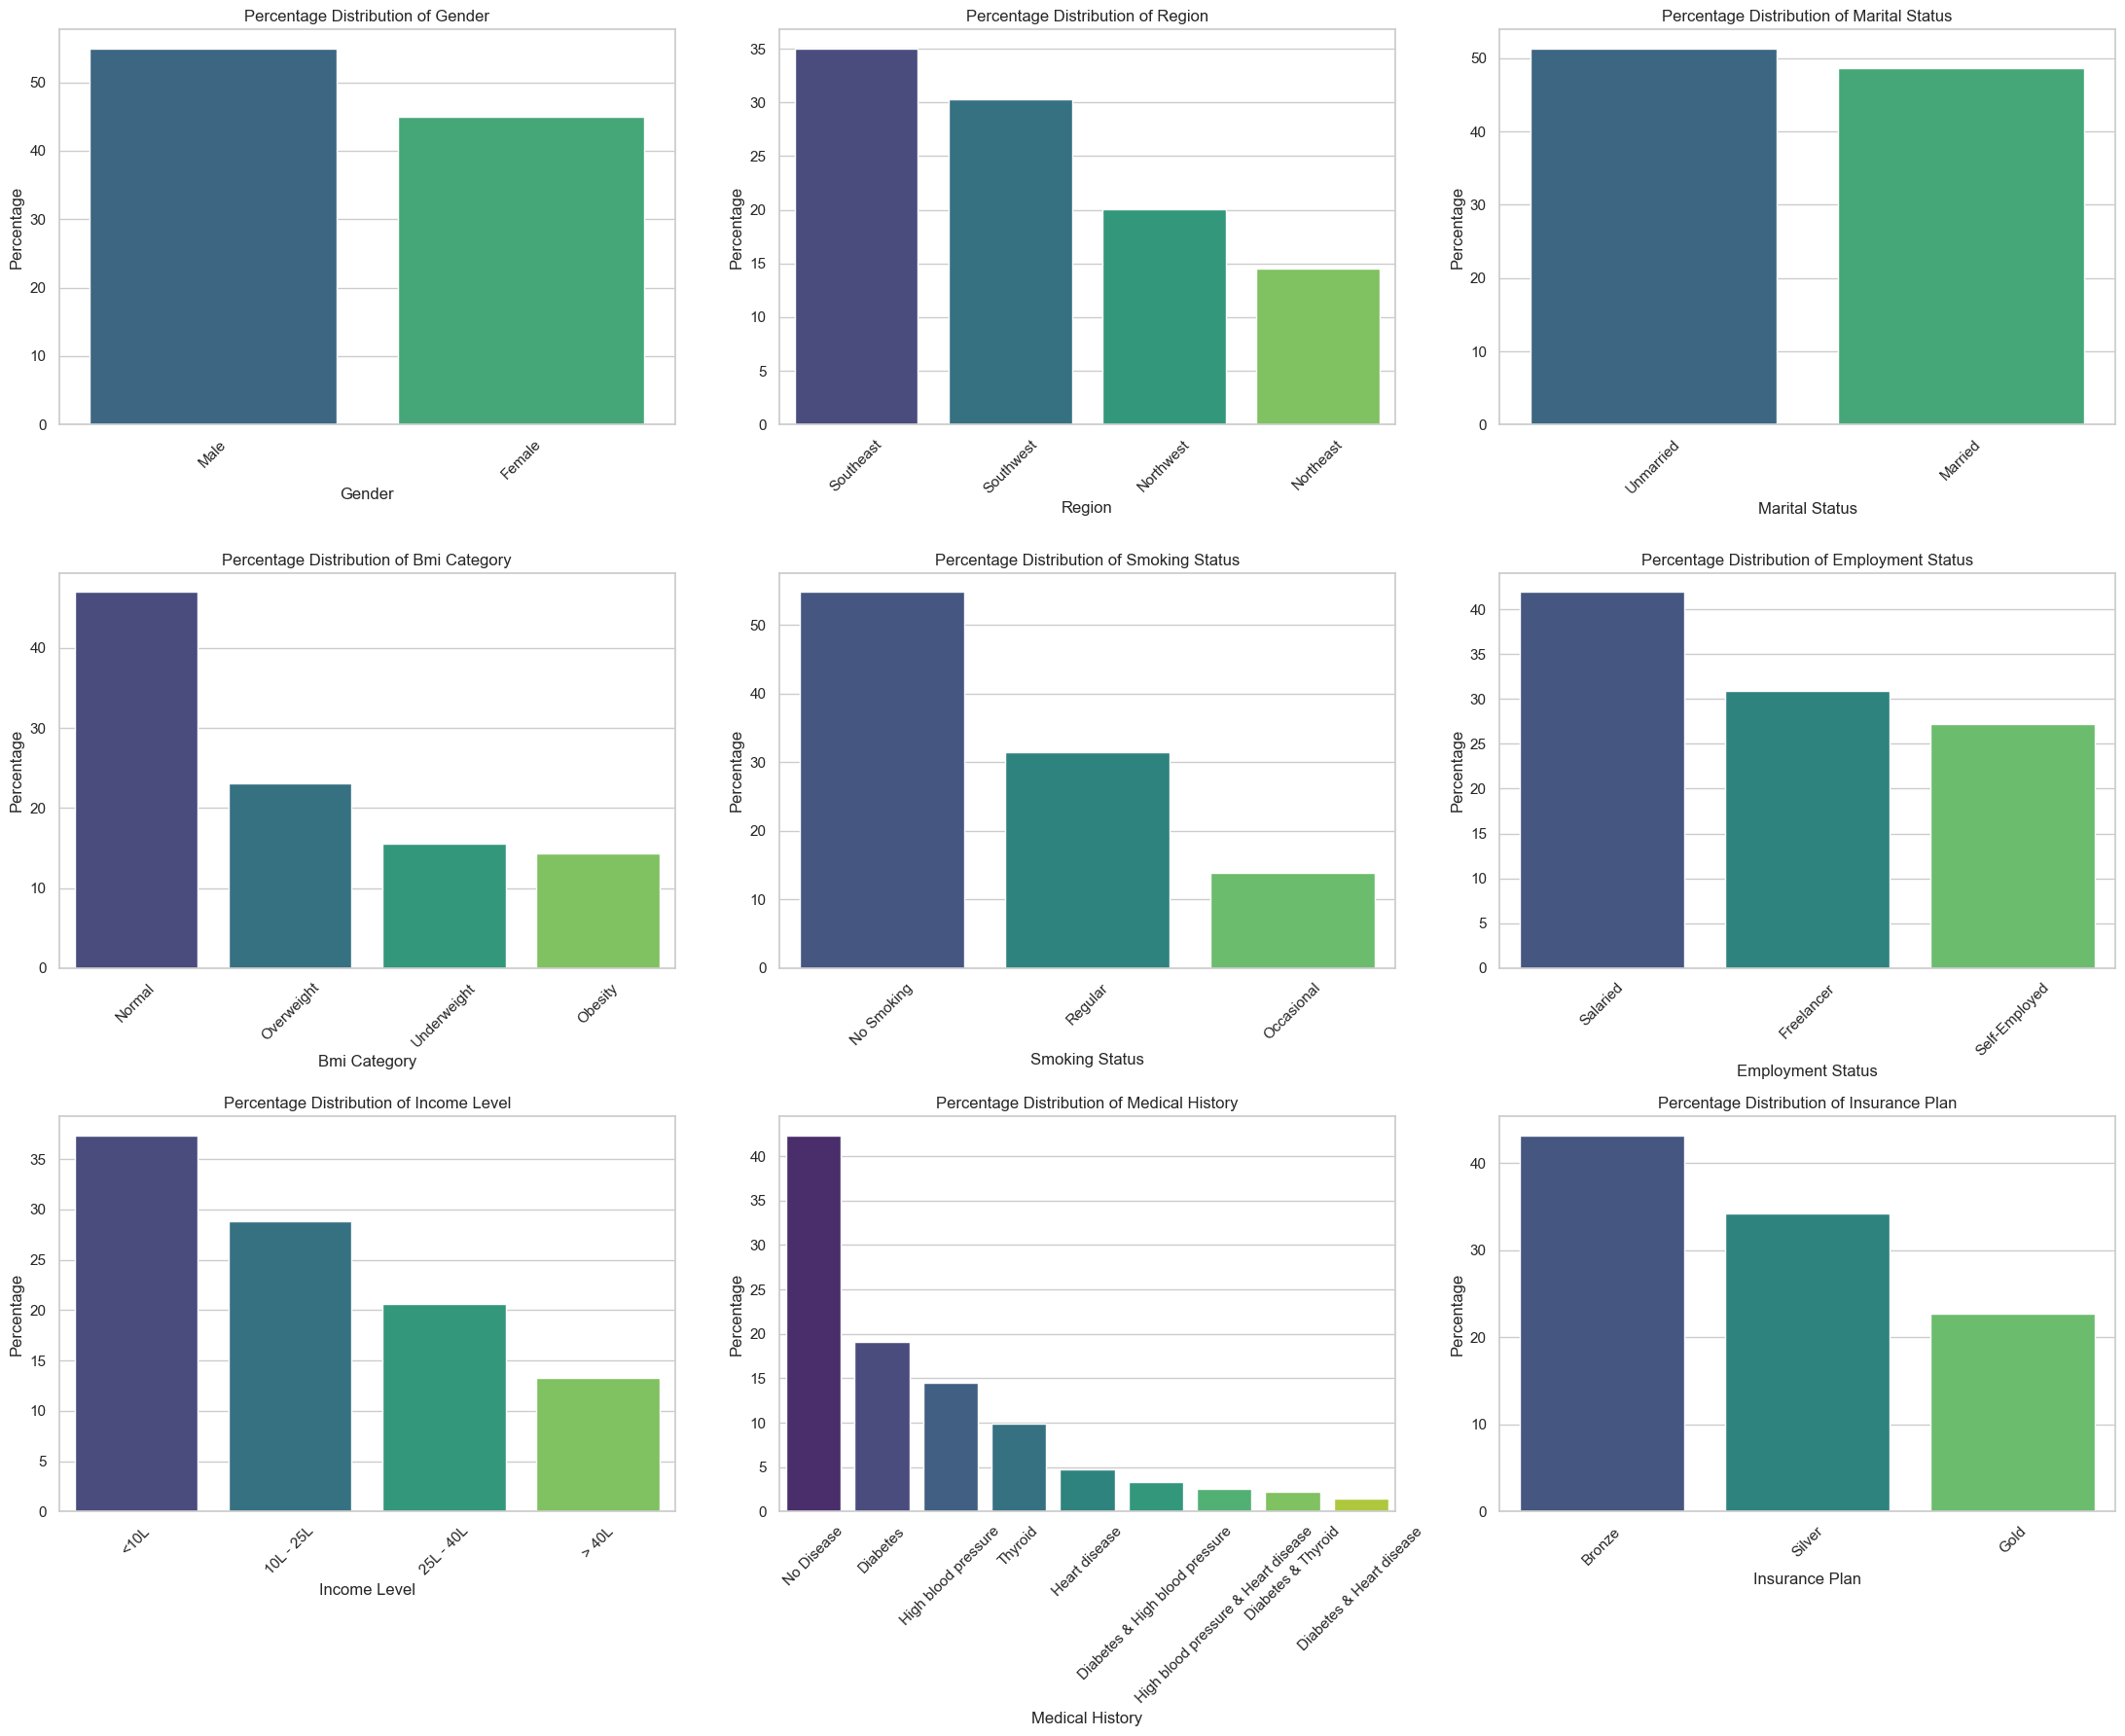

In [37]:
# Set plot style
sns.set(style='whitegrid')

# Select up to 9 categorical columns
categorical_cols = df.select_dtypes(include='object').columns[:9]

# Set up 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(22, 18))
axes = axes.flatten()

# Loop through each column and plot
for i, col in enumerate(categorical_cols):
    # Calculate percentage values
    percent_values = df[col].value_counts(normalize=True).mul(100).reset_index()
    percent_values.columns = [col, 'percentage']

    # Plot with hue to avoid deprecation warning
    sns.barplot(
        data=percent_values,
        x=col,
        y='percentage',
        hue=col,
        palette='viridis',
        legend=False,
        ax=axes[i]
    )

    # Title and labels
    axes[i].set_title(f'Percentage Distribution of {col.replace("_", " ").title()}')
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel('Percentage')
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused axes (if <9 categorical columns)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

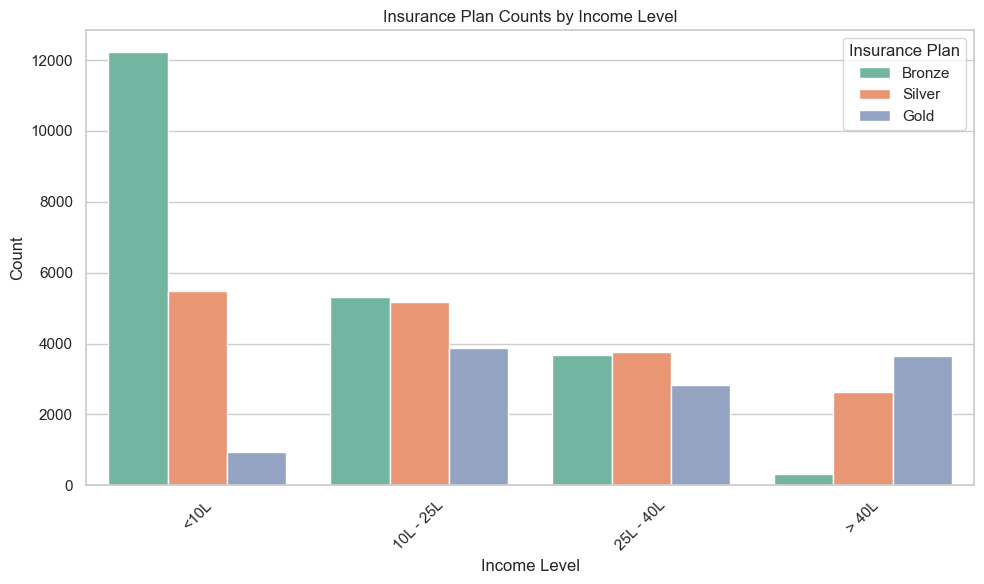

In [38]:
# Insurance Plan vs Income_level
plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x='income_level',
    hue='insurance_plan',
    palette='Set2',
    order=['<10L', '10L - 25L', '25L - 40L', '> 40L']
)
plt.title('Insurance Plan Counts by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Insurance Plan')
plt.tight_layout()
plt.show()

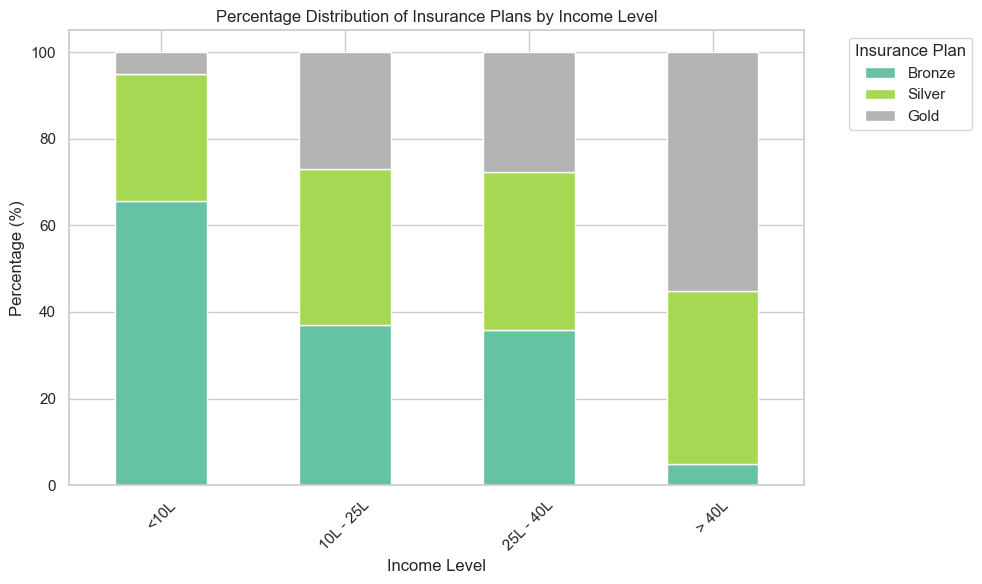

In [39]:

# Create a cross-tab of Income Level vs Insurance Plan with percentages
ct = pd.crosstab(df['income_level'], df['insurance_plan'], normalize='index') * 100

# Reorder columns and index for better visualization if needed
ct = ct[['Bronze', 'Silver', 'Gold']]
ct = ct.loc[['<10L', '10L - 25L', '25L - 40L', '> 40L']]

# Plot stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

plt.title('Percentage Distribution of Insurance Plans by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Insurance Plan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()